# Fictional Healthcare Data

### Imports

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from dateutil.relativedelta import relativedelta as rd

### Functions

In [123]:
# creates list of birthdate datetime objects based off age
def birthDate(age):
  return [dt.datetime.now() - rd(years=x) for x in age]
# creates list with multiple modes
def multimodallist(obs,stdperlist,modes):
    if obs<len(modes):
        raise Exception('obs is less than amount of modes')
    remainder = obs%len(modes)
    listSize =int((obs - remainder)/len(modes))
    multimodal = []
    # combines smaller lists with different modes to equal list with obs observations
    for i in modes:
        multimodal+=np.random.normal(i,stdperlist,listSize).astype(int).tolist()
    if remainder >0:
        multimodal+=np.random.normal(np.mean(multimodal),stdperlist,remainder).astype(int).tolist()
    return multimodal

### Data Dictionary

In [141]:
obs = 100
# age = np.random.normal(50,6,obs).astype(int)
multimodalage = multimodallist(obs,1,[23,45,65])

data = {'id':list(range(100000,100000+obs)),
        'cat1':['A'] * obs,
        'age': multimodalage,
        'birthDate': birthDate(multimodalage)
        }

### Data Visualization

count    100.000000
mean      43.970000
std       17.078816
min       22.000000
25%       23.000000
50%       45.000000
75%       64.000000
max       67.000000
Name: age, dtype: float64


<Axes: >

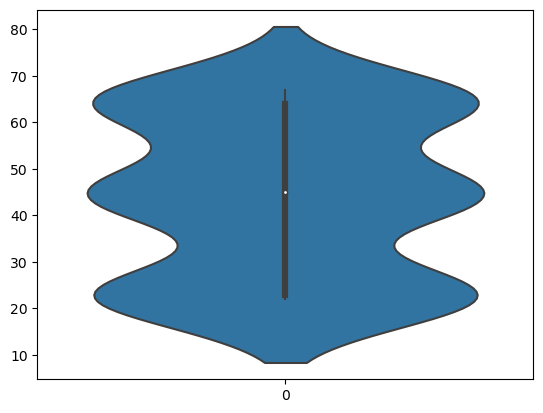

In [142]:
df = pd.DataFrame(data)
print(df['age'].describe())
sns.violinplot(df['age'])